# Analysis of Movie Industry Data

*Seamus Walsh and Daniel Gieseke  |  May 12, 2023*

Media companies in the entertainment industry hold a wealth of movie data waiting to be analyzed.  These large amounts of movie industry data include information on budgets, gross income, genre popularity, and audience ratings among others.  In this project we have cleaned, mapped, and analyzed movie industry data to understand the direction an upcoming movie production company should take to maximize profits and popularity.  For this project we have focused on general movie data from IMDB as well as movie budget and income data from 'The Numbers'.

For this project we have assumed Microsoft, a large technology company with an immense amount of capital, has decided to open a movie studio; we have prepared our analyses and recommendations accordingly.  Throughout this project we honed in on data that we believe answers the following for the tech giant:
<ul>
  <li>Amount of money to invest to receive the highest return on investment.</li>
  <li>Genre to invest in to receive the highest audience favorability and return on investment.</li>
  <li>Optimal time of year for movie releases.</li>
</ul>

We have separated our exploration and analysis of this data in this notebook into the following categories:

**Step 1:** This section includes the importing of our python modules and potential data sets.

**Step 2:** This section is where we break out and clean our data and parse out our initial analyses.

**Step 3:** This section includes our final analyses, data visualizations, and business recommendations.

For ease of reference we have included bookmarks throughout this notebook; please see below.

**Bookmarks**

Go to <a href=#STEP1> STEP 1: Importing Our Modules and Data Sets</a>
<br>
Go to <a href=#STEP2> STEP 2: Cleaning And Exploring Our Data</a>
<br>
Go to <a href=#STEP3> STEP 3: Final Analyses, Data Visualizations, and Recommendations</a>

<a name='STEP1' />

# STEP 1: Importing Our Modules and Data Sets
Here we are importing pandas, matplotlib, numpy, seaborn, and sqlite3 using standard aliases:



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3



### Importing Our Rotten Tomatoes TSV File
Below we are importing our "Rotten Tomatoes Movie Info" TSV file into our Jupyter Notebook using pandas.  Since this is a TSV file we added in a delimiter "\t" so the data is imported into a pandas data frame correctly.

In [2]:
rt_df = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')

In [3]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Importing Our IMDB CSV File

Below we are importing our first IMDB data set using pandas.  With this file there is no delimiter needed since all data is separated by commas.

In [5]:
imdb_df = pd.read_csv('zippedData/tmdb.movies.csv')

In [6]:
imdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Importing Our Bom Movie Gross CSV File

Below we are importing our Bom Movie data set using pandas in a similar fashion to our IMDB CSV file.

In [7]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv')

In [8]:
# Making sure our data loaded in a clean format
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Importing Our TN Movie Budgets CSV File

Below we are importing our TN Movie Budget data set using pandas in a similar fashion to our IMDB CSV file.

In [9]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv')

# Making sure our data loaded in a clean format
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Importing Our 'IM.DB' Data
Now for the trickiest data to import: our IM.DB SQL data.  This data is housed in a SQL data base and we want this to be imported as a pandas data frame.  Below we connect to the IMDB data base, and import two tables we think are important to our queries: the "movie_basics" and "movie_ratings" tables.

In [11]:
conn = sqlite3.connect('zippedData/im.db') 
c = conn.cursor()

In [12]:
c.execute('''
          SELECT
          *
          FROM movie_basics
          
          ''')

imdb_sql_df = pd.DataFrame(c.fetchall(), columns = ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres'])
imdb_sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
c.execute('''
          SELECT
          *
          FROM movie_ratings
          
          ''')

imdb_sql_df2 = pd.DataFrame(c.fetchall(), columns = ['movie_id', 'averagerating', 'numvotes'])
imdb_sql_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
conn.close

<function Connection.close()>


**Bookmarks**

Go to <a href=#STEP1> STEP 1: Importing Our Modules and Data Sets</a>
<br>
Go to <a href=#STEP2> STEP 2: Cleaning And Exploring Our Data</a>
<br>
Go to <a href=#STEP3> STEP 3: Final Analyses and Data Visualizations</a>
<a name='STEP2' />

# STEP 2: Cleaning And Exploring Our Data
Below we are going to clean our data so we can start parsing through and visualizing our data sets.  Based on our initial scan of all data sets uploaded, we will be focusing on the IM.DB and "The Numbers" data sets.

### TN Movie Budget Data
First up, after seeing the 'tn_df.info()' table above, we can see that all rows and values are not null, which is a great relief.  However, we can see that the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns are listed as strings.  Since we can't use strings to visualize data, we will clean them below by removing punctation and converting them from strings to integers.

In [15]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_79256/4067691972.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_79256/4067691972.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')
/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_79256/4067691972.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=Tr

In [16]:
tn_df = tn_df.astype({'production_budget':'int'})
tn_df = tn_df.astype({'domestic_gross':'int'})
tn_df = tn_df.astype({'worldwide_gross':'int'})

**Return on Investment:** Below we are creating a new column titled "Return on Investment" (ROI) so we can measure the return on investment on different types of films.  Additionally, we are cleaning up our new column and dataframe by removing rows where ROI is 0.  Given that this table is telling us that ROI is "0" might tell us that this data is wrong.

In [17]:
tn_df['return_on_investment'] = (tn_df['worldwide_gross']/tn_df['production_budget'])*100

In [18]:
# Removing ROI values that are $0.
tn_df = tn_df[tn_df['return_on_investment'] != 0]

**Release Month:** We're also creating a "Release Month" column so we can measure across the time of the year.

In [19]:
tn_df['release_month'] = pd.DatetimeIndex(tn_df['release_date']).month

**Mapping our "TN Movie Budget" Data:** Below we are mapping our newly cleaned "TN Movie Budget" data to look through a few relationships and correlations between our 'production_budget', 'domestic_gross', 'worldwide_gross', and 'return_on_investment' columns.

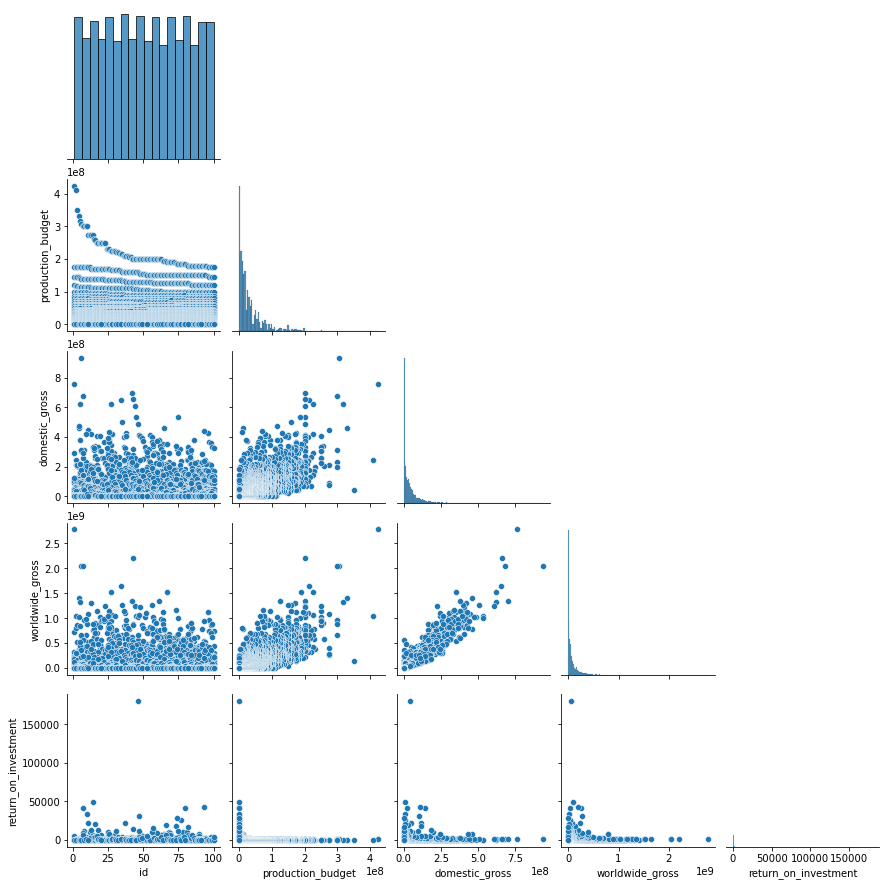

In [19]:
sns.pairplot(tn_df, corner = True)
plt.show()



**Let's investigate our first correlation!** Looking through our visualizations above, we want to further investigate the relationship between a movie's production budget and the movie's worldwide gross return.

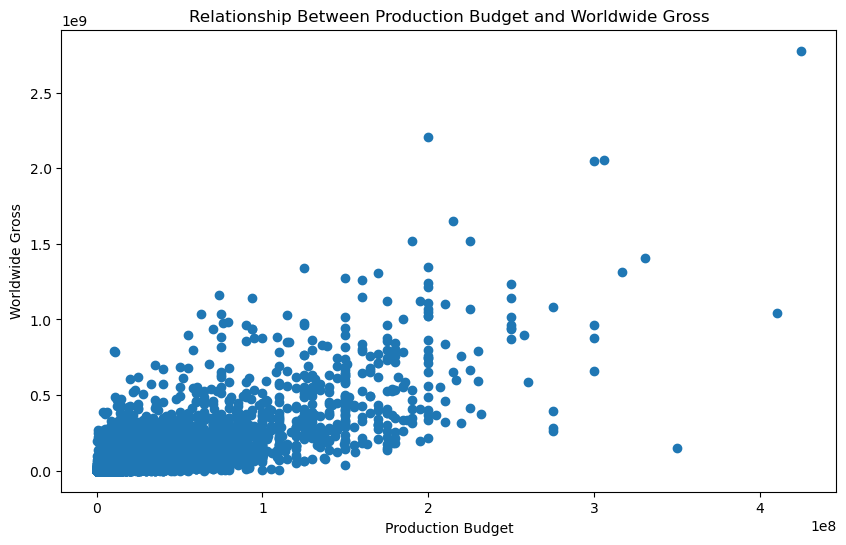

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

x = tn_df['production_budget']
y = tn_df['worldwide_gross']

ax.scatter(x,y)
ax.set_title('Relationship Between Production Budget and Worldwide Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross');

Unsurprisingly, we see that the higher the production budget, the higher the worldwide gross.  Below we went a step further to investigate the correlation coefficient between the two variables and see that they are highly positively correlated with a .75 correlation coefficient!

In [21]:
corr = tn_df['production_budget'].corr(tn_df['worldwide_gross'])
corr

0.7460130477427712

**What about the correlation between production budget and return on investment?**. Below we take similar steps to the above, however we are visualizing the relationship between the amount a studio doles out for a production budget and the return on investment.

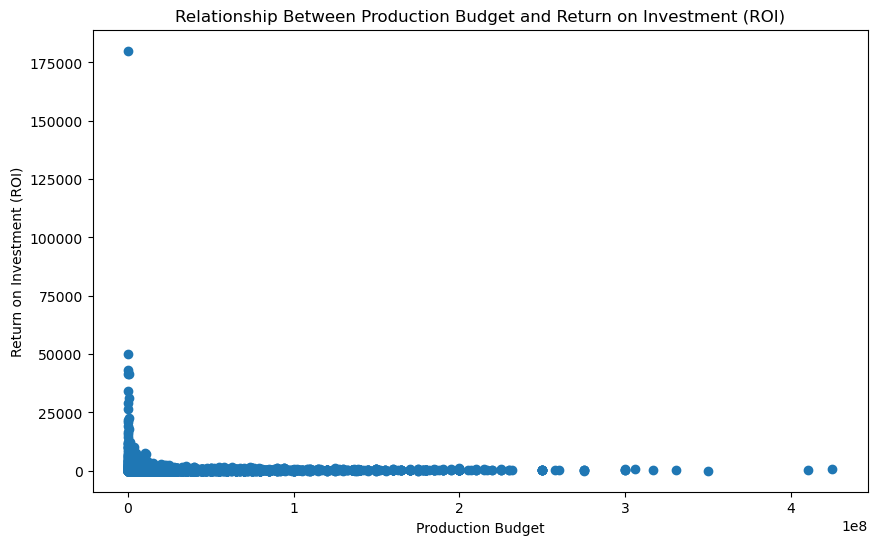

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

x = tn_df['production_budget']
y = tn_df['return_on_investment']

ax.scatter(x,y)
ax.set_title('Relationship Between Production Budget and Return on Investment (ROI)')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Return on Investment (ROI)');

It looks like there is very little correlation between a movie's production budget and the movie's return on investment.  There is actually a slight negative relationship between the two, meaning the higher the budget, the lower the expected return on investment.  However, given that the correlation coefficient is extremely close to 0, we can assume there is little to no correlation.

In [23]:
corr = tn_df['production_budget'].corr(tn_df['return_on_investment'])
corr

-0.05639103196496511

**What about a movie's release month?** Next we want to explore how return on investment differs across months of the year.

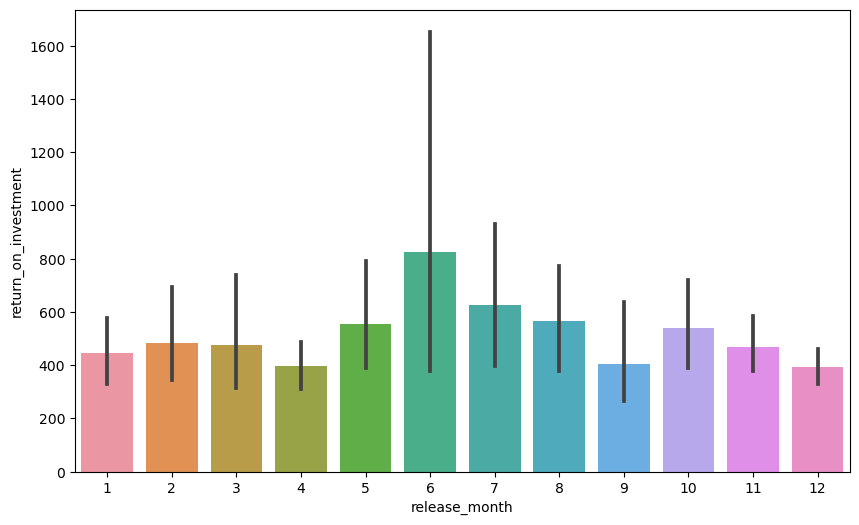

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="return_on_investment", data=tn_df)

plt.show()

It looks like July is the best month to release a movie based on ROI. However, there is a HUGE confidence interval. Let's see if we control for some outliers if it is still a good month for releases.

Below, we are creating a new column, "clean_roi", that has values that fall within the inter quartile range (IQR) of our return_on_investment column.

In [25]:
q1 = tn_df['return_on_investment'].quantile(0.25)
q3 = tn_df['return_on_investment'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a new column that contains only the non-outlier values
tn_df['clean_roi'] = tn_df.loc[(tn_df['return_on_investment'] >= lower_bound) & (tn_df['return_on_investment'] <= upper_bound), 'return_on_investment']
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,release_month,clean_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,653.257713,12,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286,5,254.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,42.789243,6,42.789243
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139,5,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,415.369636,12,415.369636


Now let's see if July is still a good month for a release, based on ROI.

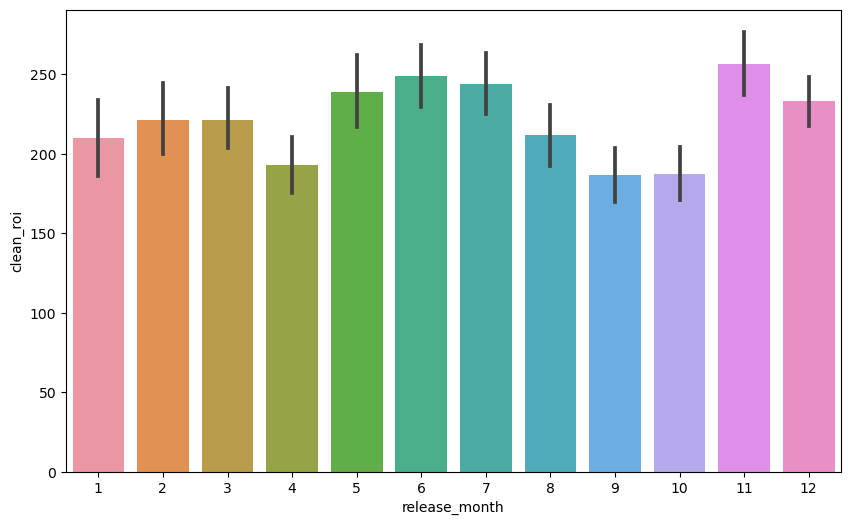

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="clean_roi", data=tn_df)

plt.show()

Looks like it's not the miracle we thought, but it still presents better ROI versus other months, with the potential for a "jackpot", considering the outliers in our other data.

Below is another look that includes a point plot.

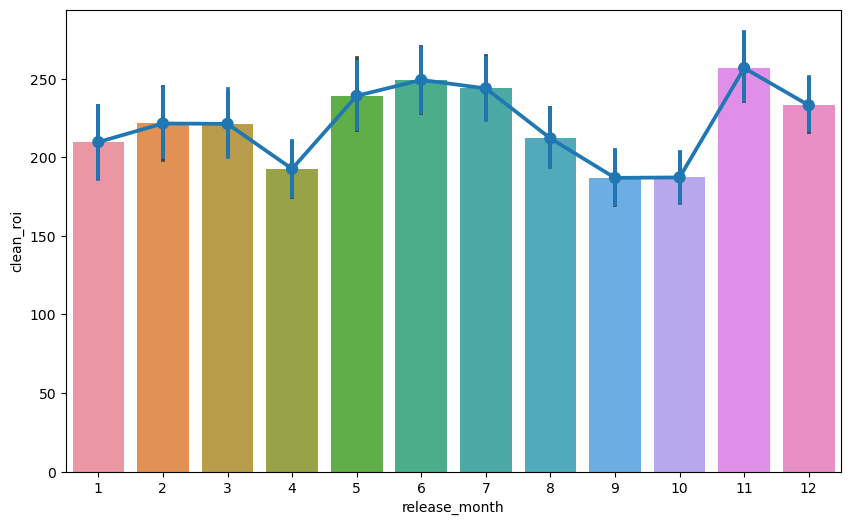

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="clean_roi", data=tn_df)

sns.pointplot(x="release_month", y="clean_roi", data=tn_df)

plt.show()

### IM.DB SQL Data
Our next batch of data to clean and explore is our IM.DB data we imported into a pandas dataframes.  Below we first joined the two tables using an inner merge--we chose this method to aggregate data as we want to see a full table so we can compare all data in lieu of a left or right join where pieces of data may be missing.  After performing our merge, we can see that our data is looking fairly healthy.  There are a number of missing values in the 'runtime_minutes' column, however we don't plan on investigating data connections using that column at this time.  We additionally see that the 'genres' column is missing data, however, we are going to leave this alone for now as this is a categorical column and we don't want to make any decisions until we know how we want to use this data.

In [28]:
imdb_sql_df3 = imdb_sql_df.merge(imdb_sql_df2)

In [29]:
imdb_sql_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Now we are going to make perform a few visualizations of the relationships between these different data columns to see if we can recognize any relationships we may want to investigate further.  We performed these visualiations using Seaborn.

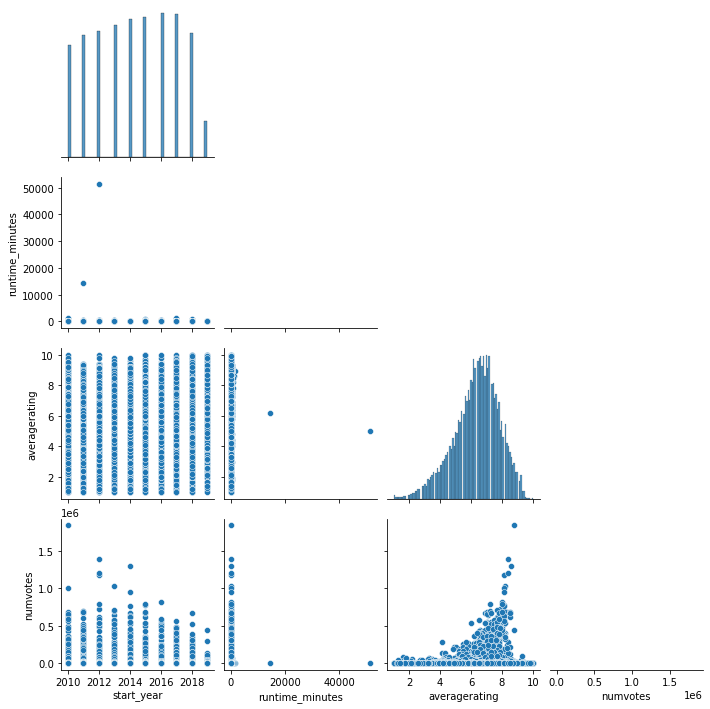

In [28]:
sns.pairplot(imdb_sql_df3, corner = True)
plt.show()

First off, we can see that there are a few outliers in our runtime_minutes column.  Though we aren't very interested in this data column, we want to investigate these outliers to see if these rows should be removed altogether. First we are creating a new data frame, dropping the null 'runtime_minutes' rows, and looking at the outliers in that column.

In [30]:
imdb_sql_df4 = imdb_sql_df3.dropna()

In [31]:
imdb_sql_df4.sort_values('runtime_minutes').tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
71479,tt8690764,"Silence not silence, red not red, live not live","Silence not silence, red not red, live not live",2018,601.0,Drama,8.6,22
53649,tt5375100,Paint Drying,Paint Drying,2016,607.0,Documentary,9.3,218
53646,tt5374716,Chamisso's Shadow,Chamissos Schatten,2016,720.0,Documentary,7.8,19
20818,tt2261469,Double Fine Adventure,Double Fine Adventure,2015,724.0,Documentary,8.5,59
67287,tt7528992,Europa: The Last Battle,Europa: The Last Battle,2017,746.0,Documentary,8.2,162
72424,tt9047474,La flor,La flor,2018,808.0,"Drama,Fantasy,Musical",8.5,100
71441,tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,"Comedy,History",8.6,5
15171,tt2008009,The Clock,The Clock,2010,1440.0,Drama,8.9,219
27683,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary,6.2,69
70280,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17


Strangely, after some research, it looks like both Modern Times Forever and Logistics are both films that are actually that long.  Since we won't be using these values at this time, we'll be leaving this alone.  Below we are going to continue cleaning our data by dropping our null rows in the 'genres' column.  We are choosing to drop these rows as we cannot fill them in with median or means of the data as 'genres' is a categorical column.

In [32]:
imdb_sql_df3 = imdb_sql_df3.dropna(subset=['genres'])
imdb_sql_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


**Let's start mapping out by genre!** Now that we have a cleaner 'genres' column, we want to investigate which genres are received the best by audiences by mapping out average rating by genre.  However, we first have to find a good measure of central tendency.  Given that we saw outliers in this data set with the 'runtime_minutes' column, we are going to choose 'median' as a measure of central tendency so we don't have outliers that heavily skew the data.

Below we are calculating the median 'averagerating' by genre.  We then go on to plug these values into a bar chart to visualize our findings. As we saw in our data frame heads, we need to search the genre column for terms like "Documentary" or "Drama" as genres are lumped together in each row.

In [35]:
doc_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Documentary")]['averagerating'].median()
drama_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Drama")]['averagerating'].median()
horror_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Horror")]['averagerating'].median()
comedy_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Comedy")]['averagerating'].median()
history_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("History")]['averagerating'].median()
fantasy_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Fantasy")]['averagerating'].median()
animation_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Animation")]['averagerating'].median()
scifi_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Sci-Fi")]['averagerating'].median()
action_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Action")]['averagerating'].median()

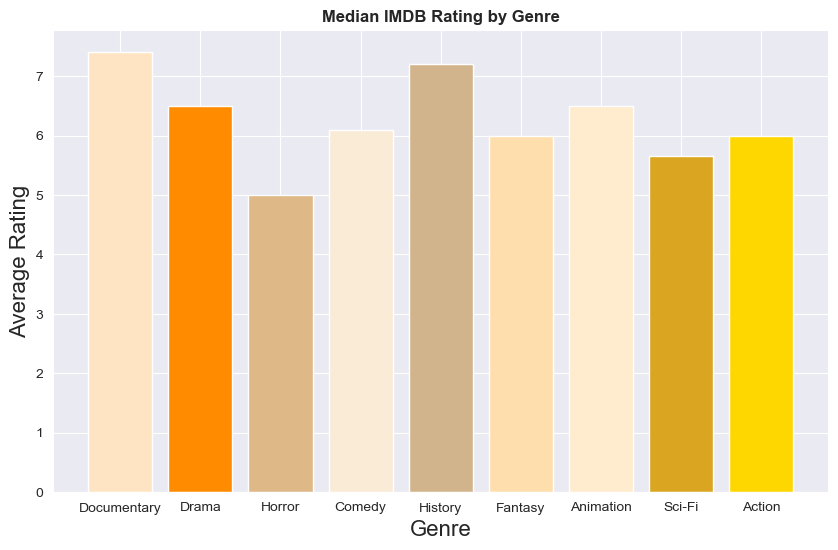

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(['Documentary', 'Drama', 'Horror', 'Comedy', 'History', 'Fantasy', 'Animation', 'Sci-Fi', 'Action'], 
       [doc_ave, drama_ave, horror_ave, comedy_ave, history_ave, fantasy_ave, animation_ave, scifi_ave, action_ave],
      color=['bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'goldenrod', 'gold'])

# Labels
ax.set_title('Median IMDB Rating by Genre', fontweight="bold")
ax.set_xlabel('Genre', fontsize = 16)
ax.set_ylabel('Average Rating', fontsize = 16);

### Merging our IMBD and TN Budget Data Sets
Given our interesting findings above, we want to go a step further and look into the relationship between return on investment and the genre of a movie.  To see this, we'll need to merge our IMDB and TN Budget data sets.  Below is our code doing so.

In [37]:
im_db = imdb_sql_df3.rename(columns={'primary_title': 'movie'})

In [38]:
genre_money_df = pd.merge(im_db, tn_df, on ='movie')

In [39]:
genre_money_df

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,return_on_investment,release_month,clean_roi
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",45000000,0,73706,0.163791,12,0.163791
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",25000000,720828,9313302,37.253208,3,37.253208
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",25000000,720828,9313302,37.253208,3,37.253208
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",25000000,720828,9313302,37.253208,3,37.253208
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",91000000,58236838,187861183,206.440860,12,206.440860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,tt8680254,Richard III,Richard III,2016,NaN,Drama,9.1,28,65,"Dec 29, 1995",9200000,2684904,4199334,45.644935,12,45.644935
2588,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",400000,655538,655538,163.884500,10,163.884500
2589,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",38000000,31811527,49678401,130.732634,2,130.732634
2590,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,33,"Mar 29, 2019",6000000,18107621,18107621,301.793683,3,301.793683


**YIKES! We have mismatched data!** Looking at the data above, we can see a few instances where our merge went awry.  We can see that there are a few instances where when we merged the two data sets based on movie title, different movies with the same name were merged in the same row.  To fix this, we are going to weed out these issues by only including data where the release years of movies are matched.

In [40]:
genre_money_df = genre_money_df.astype({'release_date':'str'})
genre_money_df['year'] = genre_money_df['release_date'].str[-4:]

In [41]:
genre_money_df['year'] = genre_money_df['year'].astype(int)

In [42]:
genre_money_df = genre_money_df[genre_money_df['start_year'] == genre_money_df['year']]

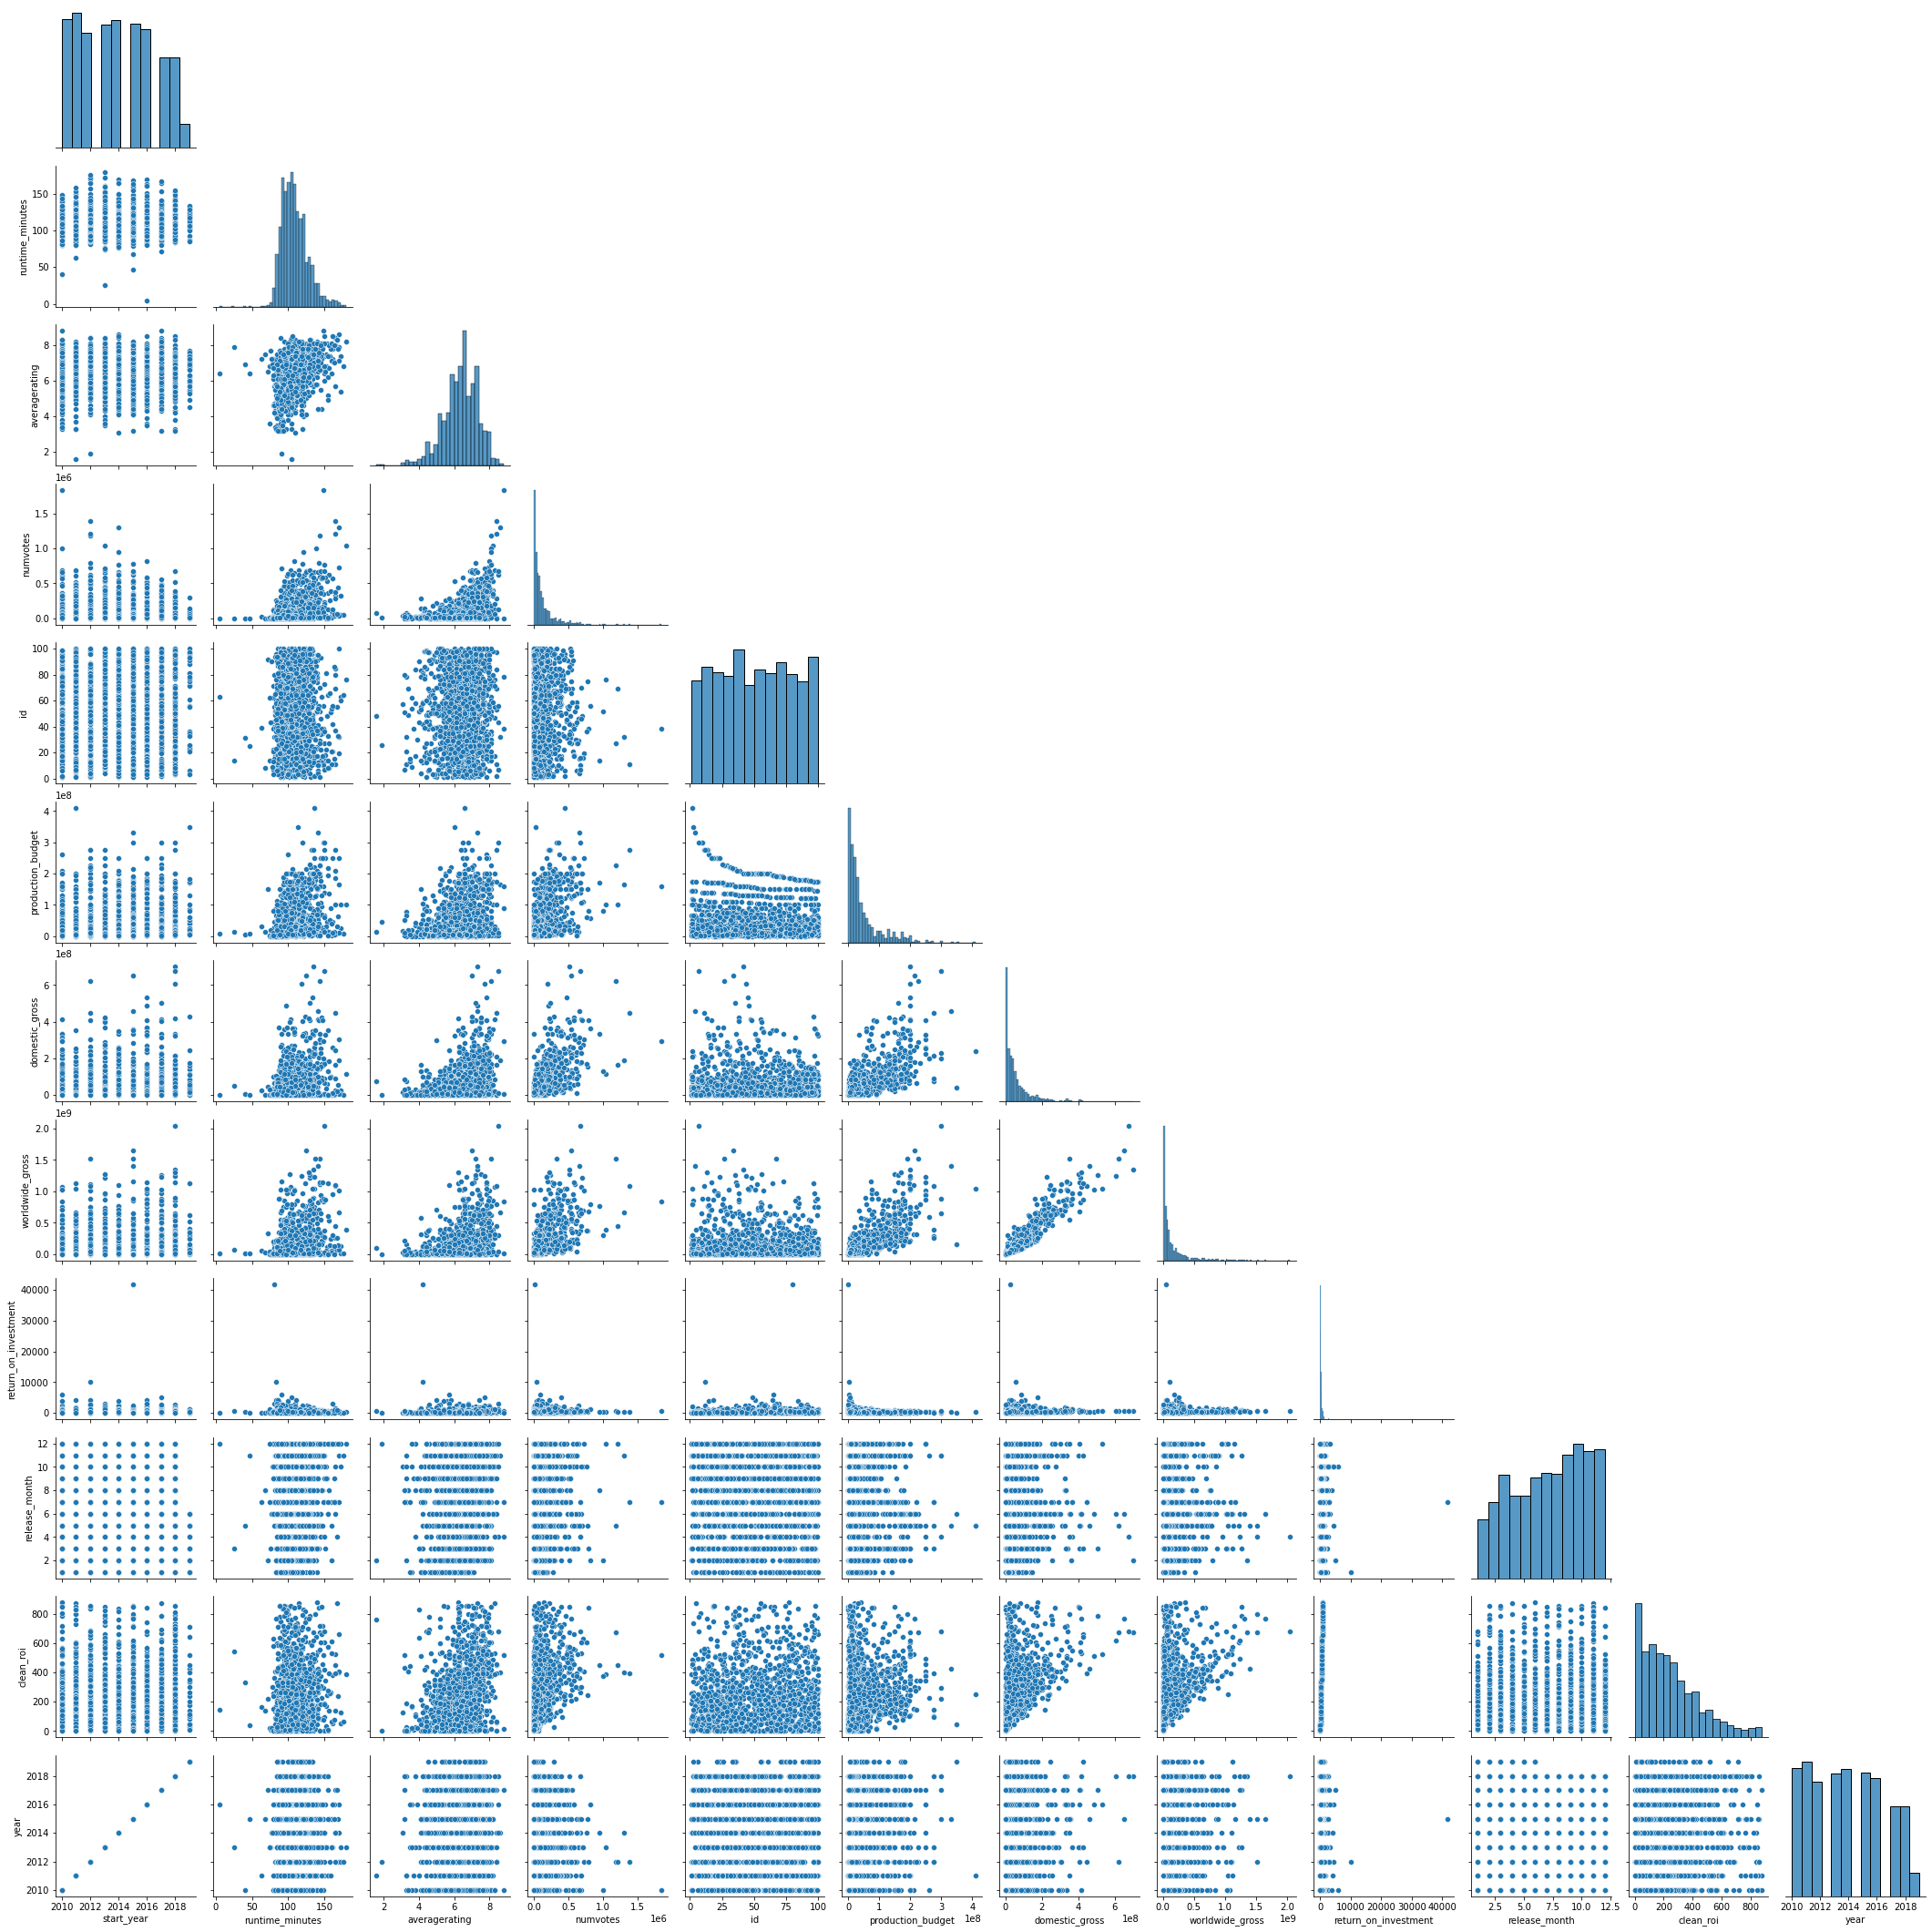

In [41]:
sns.pairplot(genre_money_df, corner = True)
plt.show()

As with our previous measure of central tendency, we are going to stick with our median return on investment for this visualization.  We are going this route to account for outliers in our data.

In [43]:
doc_ROI = genre_money_df[genre_money_df['genres'].str.contains("Documentary")]['return_on_investment'].median()
drama_ROI = genre_money_df[genre_money_df['genres'].str.contains("Drama")]['return_on_investment'].median()
horror_ROI = genre_money_df[genre_money_df['genres'].str.contains("Horror")]['return_on_investment'].median()
comedy_ROI = genre_money_df[genre_money_df['genres'].str.contains("Comedy")]['return_on_investment'].median()
history_ROI = genre_money_df[genre_money_df['genres'].str.contains("History")]['return_on_investment'].median()
fantasy_ROI = genre_money_df[genre_money_df['genres'].str.contains("Fantasy")]['return_on_investment'].median()
animation_ROI = genre_money_df[genre_money_df['genres'].str.contains("Animation")]['return_on_investment'].median()
scifi_ROI = genre_money_df[genre_money_df['genres'].str.contains("Sci-Fi")]['return_on_investment'].median()
action_ROI = genre_money_df[genre_money_df['genres'].str.contains("Action")]['return_on_investment'].median()

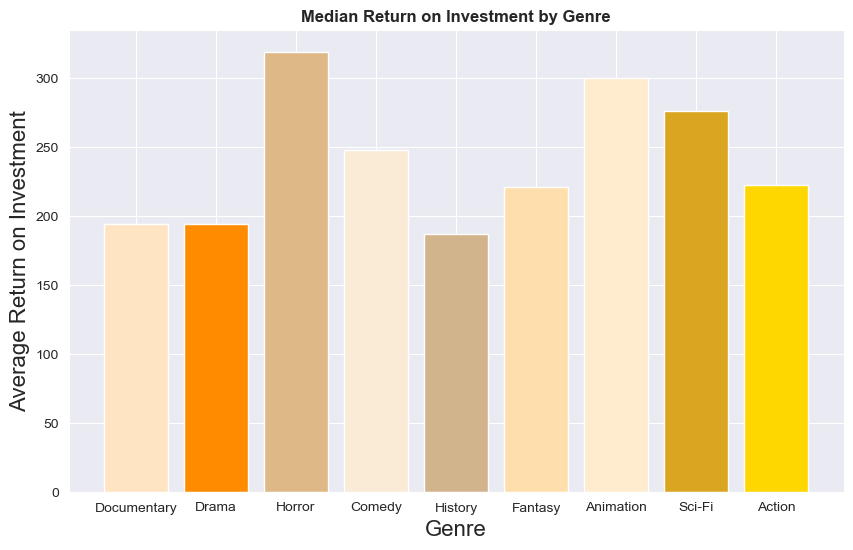

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(['Documentary', 'Drama', 'Horror', 'Comedy', 'History', 'Fantasy', 'Animation', 'Sci-Fi', 'Action'], 
       [doc_ROI, drama_ROI, horror_ROI, comedy_ROI, history_ROI, fantasy_ROI, animation_ROI, scifi_ROI, action_ROI],
      color=['bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'goldenrod', 'gold'])

# Labels
ax.set_title('Median Return on Investment by Genre', fontweight="bold")
ax.set_xlabel('Genre', fontsize = 16)
ax.set_ylabel('Average Return on Investment', fontsize = 16);

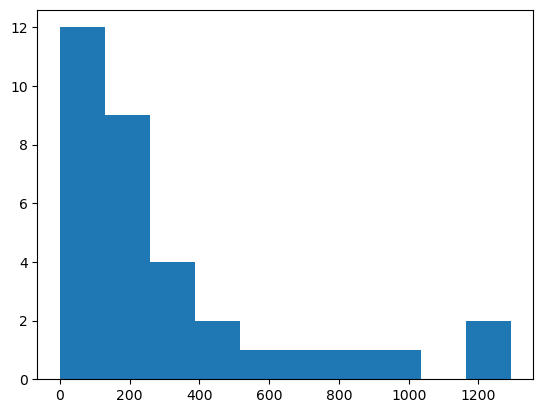

In [45]:
plt.hist(genre_money_df[genre_money_df['genres'].str.contains("Documentary")]['return_on_investment'])
plt.show() 

Given the above, we see a few genres that may be good markets to enter.  Below we are going to go a step further and map out the market share by genre to see if we can enter into a genre with a growing market share.

In [46]:
%%capture seaborn_subplots
fig, ax = plt.subplots(3, 3, figsize=(12,8))

fig.suptitle('Market Share by Genre Over Time')

sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Documentary"), 
                data = imdb_sql_df3, ax = ax[0][0]).set(title='Documentary')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Drama"), 
                data = imdb_sql_df3, ax = ax[0][1]).set(title='Drama')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Horror"), 
                data = imdb_sql_df3, ax = ax[0][2]).set(title='Horror')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Comedy"), 
                data = imdb_sql_df3, ax = ax[1][0]).set(title='Comedy')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("History"), 
                data = imdb_sql_df3, ax = ax[1][1]).set(title='History')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Fantasy"), 
                data = imdb_sql_df3, ax = ax[1][2]).set(title='Fantasy')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Animation"), 
                data = imdb_sql_df3, ax = ax[2][0]).set(title='Animation')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Sci-Fi"), 
                data = imdb_sql_df3, ax = ax[2][1]).set(title='Sci-Fi')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Action"), 
                data = imdb_sql_df3, ax = ax[2][2]).set(title='Action')

ax[0][0].set_xlabel('Release Year')
ax[0][0].set_ylabel('Genre Market Share')

ax[0][1].set_xlabel('Release Year')
ax[0][1].set_ylabel('Genre Market Share')

ax[0][2].set_xlabel('Release Year')
ax[0][2].set_ylabel('Genre Market Share')

ax[1][0].set_xlabel('Release Year')
ax[1][0].set_ylabel('Genre Market Share')

ax[1][1].set_xlabel('Release Year')
ax[1][1].set_ylabel('Genre Market Share')

ax[1][2].set_xlabel('Release Year')
ax[1][2].set_ylabel('Genre Market Share')

ax[2][0].set_xlabel('Release Year')
ax[2][0].set_ylabel('Genre Market Share')

ax[2][1].set_xlabel('Release Year')
ax[2][1].set_ylabel('Genre Market Share')

ax[2][2].set_xlabel('Release Year')
ax[2][2].set_ylabel('Genre Market Share')


plt.tight_layout()

plt.show()

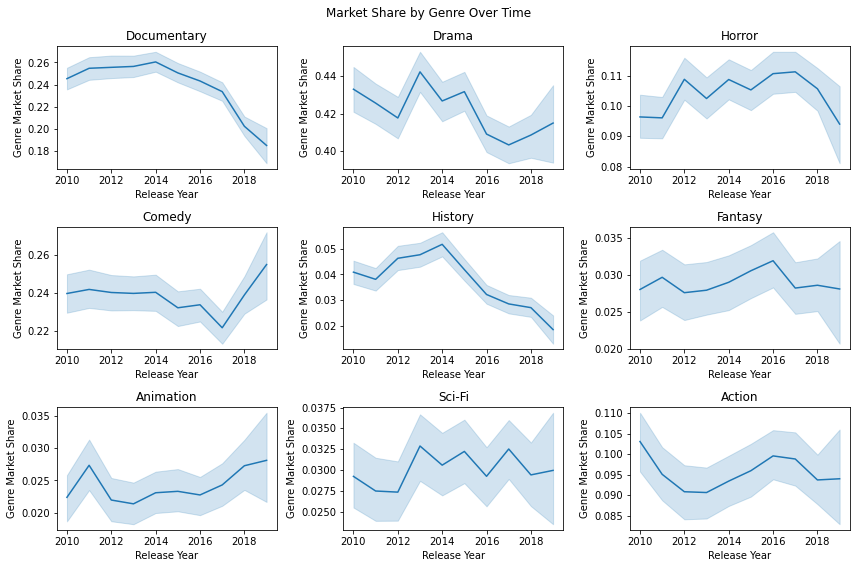

In [44]:
seaborn_subplots()


**Bookmarks**

Go to <a href=#STEP1> STEP 1: Importing Our Modules and Data Sets</a>
<br>
Go to <a href=#STEP2> STEP 2: Cleaning And Exploring Our Data</a>
<br>
Go to <a href=#STEP3> STEP 3: Final Analyses, Data Visualizations, and Recommendations</a>
<a name='STEP3' />

# STEP 3: Final Analyses, Data Visualizations, and Recommendations
Below we have mapped out our final analyses that we believe are significant and of importance to a company as they begin to explore entering the movie industry.  Below we have prepared analyses and recommendations based on the following:

<b>1.)</b> The relationship between production budgets and return on investment.

<b>2.)</b> The relationship between movie genre, median audience rating, and median return on investment.

<b>3.)</b> The relationship between movie release month and return on investment.

<b> 4.)</b> The market share of each genre over time.

## Relationship between Production Budget, Worldwide Gross, and Return on Investment
Below we have mapped out the relationship between movies' production budget and worldwide gross, and the relationship between movies' production budget and return on investment.  An increase in a production budget historically shows an increase in worldwide gross, however an increase in production budget has little to no effect on overall return on investment.  Following our charts below we have included the correlation coefficients for these relationships.

Unsurprisingly, we can see that there is a strong positive relationship between a movie's production budget and worldwide gross, however, it looks like there is very little correlation between a movie's production budget and the movie's return on investment. There is actually a slight negative relationship between the two, meaning the higher the budget, the lower the expected return on investment. However, given that the correlation coefficient is extremely close to 0, we can assume there is little to no correlation.

All this being said, we believe it is safe to reccomend to a business entering the movie industry that they needn't focus on increasing a production budget if they are solely looking for a greater return on investment.

In [47]:
%%capture seaborn_subplots

sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle('Production Budget vs Worldwide Gross and Return on Investment', weight='bold')

sns.scatterplot(x = 'production_budget', y = 'worldwide_gross', data = tn_df, ax = ax[0] )
sns.scatterplot(x = 'production_budget', y = 'return_on_investment', data = tn_df, ax = ax[1] )

ax[0].set_xlabel('Production Budget')
ax[0].set_ylabel('Worldwide Gross')

ax[1].set_xlabel('Production Budget')
ax[1].set_ylabel('Return on Investment')

plt.tight_layout()

plt.show()

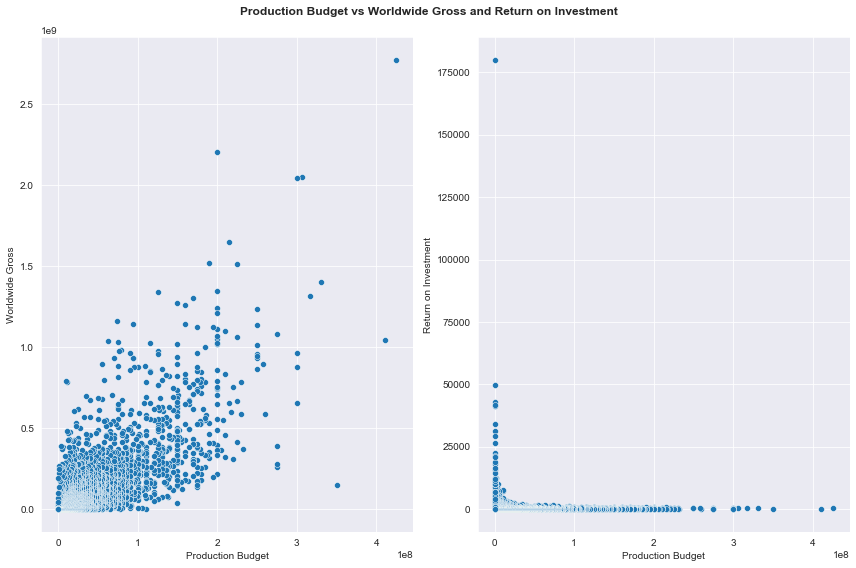

In [86]:
seaborn_subplots()

In [48]:
print("Correlation Coefficient between Production Budget and Worldwide Gross:", 
      tn_df['production_budget'].corr(tn_df['worldwide_gross']))
print("Correlation Coefficient between Production Budget and Return on Investment:", 
      tn_df['production_budget'].corr(tn_df['return_on_investment']))

Correlation Coefficient between Production Budget and Worldwide Gross: 0.7460130477427712
Correlation Coefficient between Production Budget and Return on Investment: -0.05639103196496511


## Genres by Audience Favorability and Return on Investment
Below we have prepared visualizations on the relationship between a movie's genre and a movie's average rating as well as the relationship between a movie's genre and its return on investment.  We can see below that the genre with the highest audience ratings are documentaries while the movies with the lowest audience ratings are horror movies.  however, we see a different story when it comes to the return on investment for movies by genre.  While horror movies have the lowest audience ratings on average, they yield the highest return on investment.  This inverse relationship can be seen with the documentary genre as well.

In comparing the graphs below, we believe it may be worthwhile for a company to pursue a genre with high average rating as well as high average return on investment.  We suggest a company entering the movie industry pursue movies in the 'animation' genre as these films yield high median audience ratings as well as high return on investments.

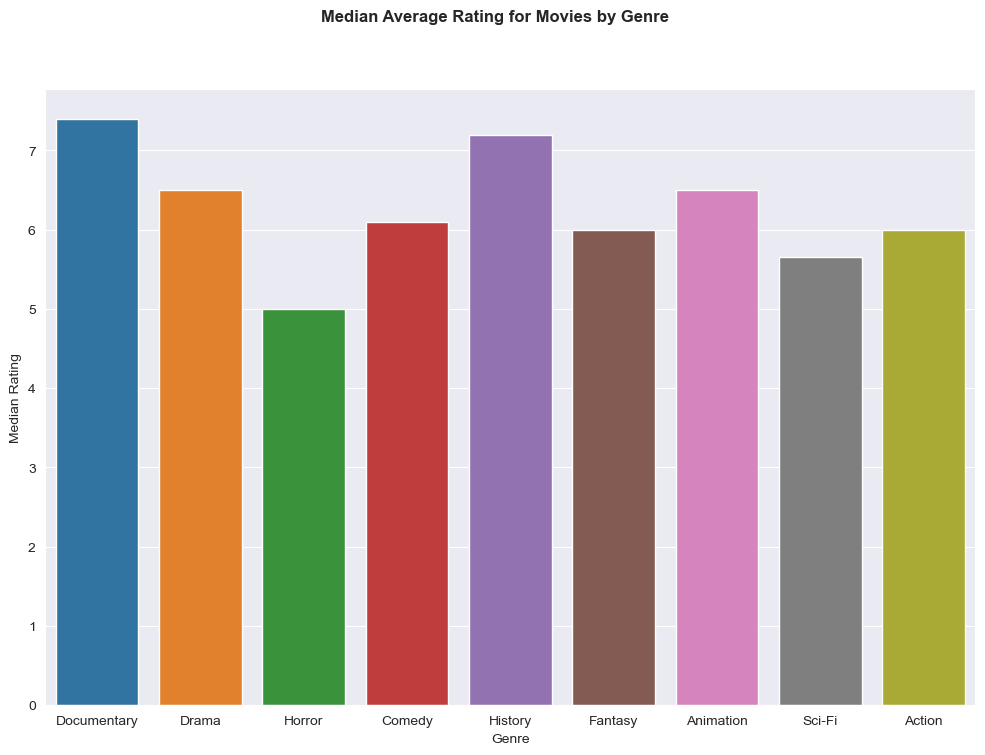

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style("darkgrid")

fig.suptitle('Median Average Rating for Movies by Genre', weight='bold')

sns.barplot(x = ['Documentary', 'Drama', 'Horror', 'Comedy', 'History', 'Fantasy', 'Animation', 'Sci-Fi', 'Action'], 
       y = [doc_ave, drama_ave, horror_ave, comedy_ave, history_ave, fantasy_ave, animation_ave, scifi_ave, action_ave])


ax.set_xlabel('Genre')
ax.set_ylabel('Median Rating')

plt.show()

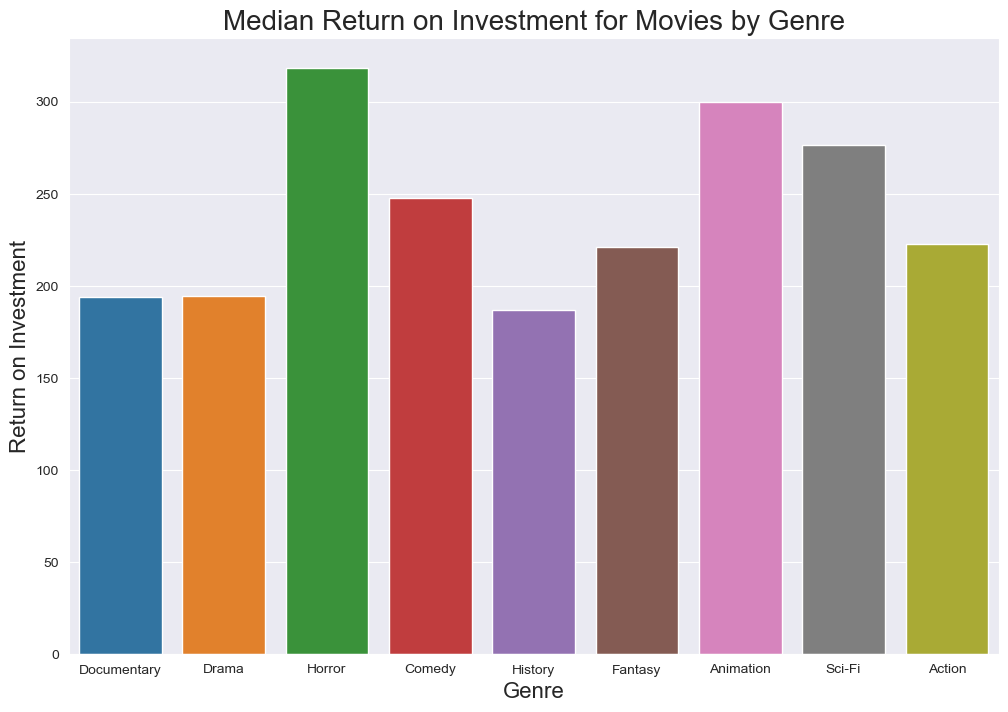

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style("darkgrid")

sns.barplot(x = ['Documentary', 'Drama', 'Horror', 'Comedy', 'History', 'Fantasy', 'Animation', 'Sci-Fi', 'Action'], 
       y = [doc_ROI, drama_ROI, horror_ROI, comedy_ROI, history_ROI, fantasy_ROI, animation_ROI, scifi_ROI, action_ROI])

ax.set_xlabel('Genre', fontsize = 16)
ax.set_ylabel('Return on Investment', fontsize = 16)
ax.set_title('Median Return on Investment for Movies by Genre', fontsize = 20)

plt.show()

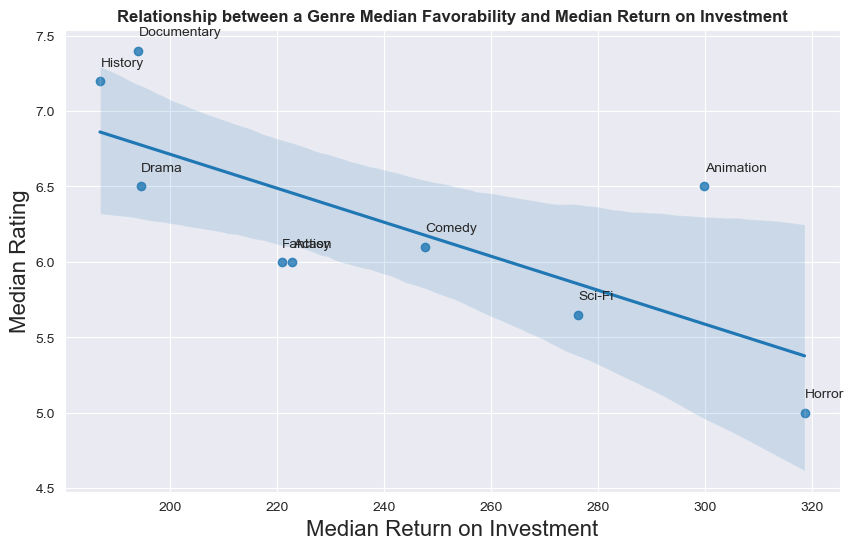

In [59]:
genres = ['Documentary', 'Drama', 'Horror', 'Comedy', 'History', 'Fantasy', 'Animation', 'Sci-Fi', 'Action']
genre_roi = [doc_ROI, drama_ROI, horror_ROI, comedy_ROI, history_ROI, fantasy_ROI, animation_ROI, scifi_ROI, action_ROI]
genre_ave = [doc_ave, drama_ave, horror_ave, comedy_ave, history_ave, fantasy_ave, animation_ave, scifi_ave, action_ave]

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style("darkgrid")

sns.regplot(x = genre_roi, y = genre_ave)

for i, genre in enumerate (genres):
    plt.text(genre_roi[i]+0.1, genre_ave[i]+0.1, genre)


ax.set_xlabel('Median Return on Investment', fontsize = 16)
ax.set_ylabel('Median Rating', fontsize = 16)
ax.set_title('Relationship between a Genre Median Favorability and Median Return on Investment', weight = 'bold')

plt.show()


## Relationship between Movie Release Month and Return on Investment
Below are visualizations of the relationship between movie release months and average return on investment.  With our first graph we can see that July may be the best month to release a movie if we are seeking a high ROI, however, we want to control this data as we can see a large confidence interval on our July data.  Our second graph below shows the same chart yet with outliers removed.  Based on our analysis of this data, we believe June to be the best month to release a movie to see a higher ROI and a safer month to choose for a company entering the movie industry.

We went a step further with our third chart below to map out ROIs for movies released in June by genre.  This doubles down on our findings above that a company looking to enter the market and plan for a June release should focus on the 'animation' genre.

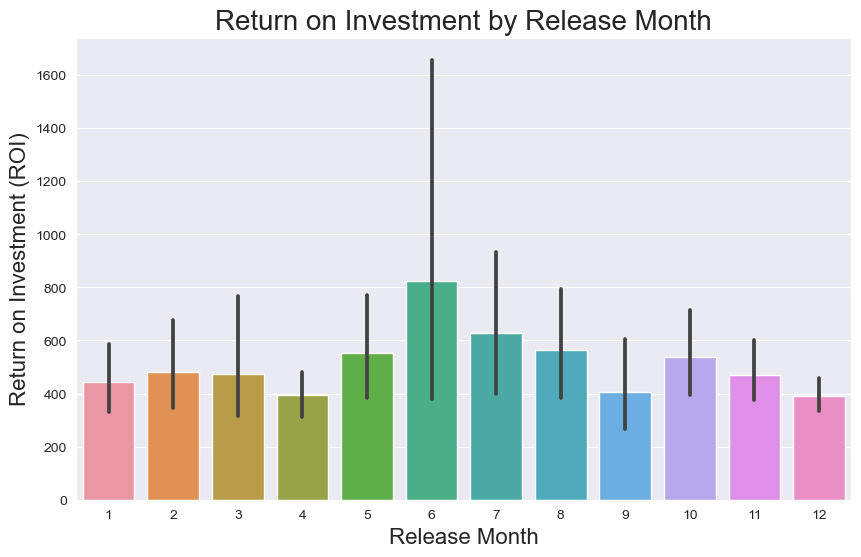

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="return_on_investment", data=tn_df)

ax.set_xlabel('Release Month', fontsize = 16)
ax.set_ylabel('Return on Investment (ROI)', fontsize = 16)
ax.set_title('Return on Investment by Release Month', fontsize = 20) 

plt.show()

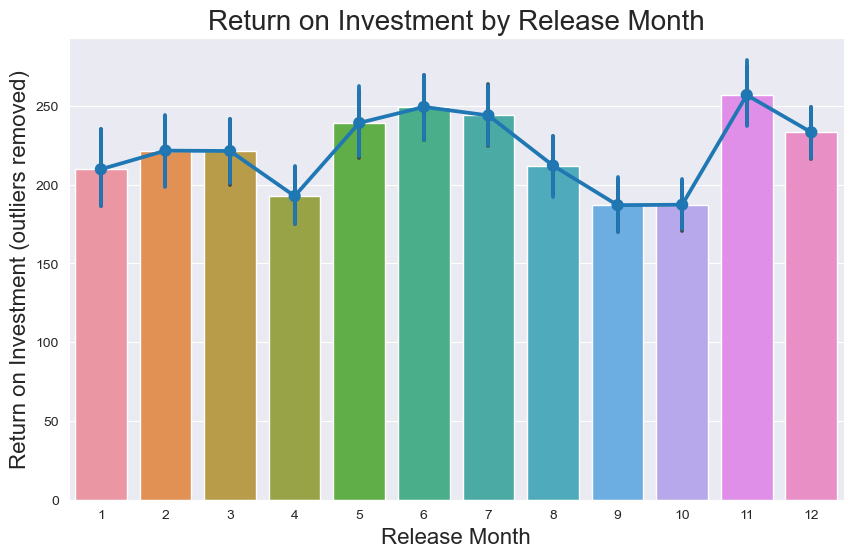

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="clean_roi", data=tn_df)

sns.pointplot(x="release_month", y="clean_roi", data=tn_df)

ax.set_xlabel('Release Month', fontsize = 16)
ax.set_ylabel('Return on Investment (outliers removed)', fontsize = 16)
ax.set_title('Return on Investment by Release Month', fontsize = 20) 

plt.show()

In [67]:
june_df = genre_money_df[genre_money_df['release_month'] == 6]

In [68]:
doc_june_ROI = june_df[june_df['genres'].str.contains("Documentary")]['return_on_investment'].median()
drama_june_ROI = june_df[june_df['genres'].str.contains("Drama")]['return_on_investment'].median()
horror_june_ROI = june_df[june_df['genres'].str.contains("Horror")]['return_on_investment'].median()
comedy_june_ROI = june_df[june_df['genres'].str.contains("Comedy")]['return_on_investment'].median()
history_june_ROI = june_df[june_df['genres'].str.contains("History")]['return_on_investment'].median()
fantasy_june_ROI = june_df[june_df['genres'].str.contains("Fantasy")]['return_on_investment'].median()
animation_june_ROI = june_df[june_df['genres'].str.contains("Animation")]['return_on_investment'].median()
scifi_june_ROI = june_df[june_df['genres'].str.contains("Sci-Fi")]['return_on_investment'].median()
action_june_ROI = june_df[june_df['genres'].str.contains("Action")]['return_on_investment'].median()

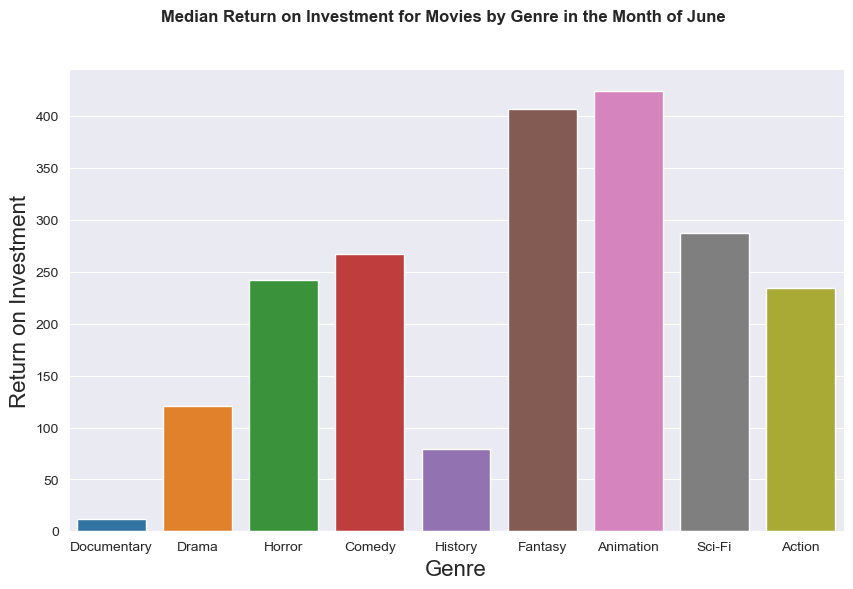

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))

fig.suptitle('Median Return on Investment for Movies by Genre in the Month of June', weight='bold')

sns.barplot(x = ['Documentary', 'Drama', 'Horror', 'Comedy', 'History', 'Fantasy', 'Animation', 'Sci-Fi', 'Action'], 
       y = [doc_june_ROI, drama_june_ROI, horror_june_ROI, comedy_june_ROI, history_june_ROI, fantasy_june_ROI, 
            animation_june_ROI, scifi_june_ROI, action_june_ROI])

ax.set_xlabel('Genre', fontsize = 16)
ax.set_ylabel('Return on Investment', fontsize = 16)

plt.show()

## Market Share by Genre over Time
Lastly we explore the relationship between the market share of a genre over time.  More specifically, the charts below show us the market share of each genre by year.  We are interested in this data as we want to explore which genres are growing in popularity.  We see below that two genres that are falling out of popularity include the documentary and history genres, where the animation genre is growing in popularity.  This, again, tells us that animation is a good genre to choose if entering the movie industry.

In [89]:
%%capture seaborn_subplots
fig, ax = plt.subplots(3, 3, figsize=(12,8))

fig.suptitle('Market Share by Genre Over Time', weight='bold')

sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Documentary"), 
                data = imdb_sql_df3, ax = ax[0][0]).set(title='Documentary')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Drama"), 
                data = imdb_sql_df3, ax = ax[0][1]).set(title='Drama')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Horror"), 
                data = imdb_sql_df3, ax = ax[0][2]).set(title='Horror')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Comedy"), 
                data = imdb_sql_df3, ax = ax[1][0]).set(title='Comedy')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("History"), 
                data = imdb_sql_df3, ax = ax[1][1]).set(title='History')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Fantasy"), 
                data = imdb_sql_df3, ax = ax[1][2]).set(title='Fantasy')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Animation"), 
                data = imdb_sql_df3, ax = ax[2][0]).set(title='Animation')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Sci-Fi"), 
                data = imdb_sql_df3, ax = ax[2][1]).set(title='Sci-Fi')
sns.lineplot(x = 'start_year', y = imdb_sql_df3['genres'].str.contains("Action"), 
                data = imdb_sql_df3, ax = ax[2][2]).set(title='Action')

ax[0][0].set_xlabel('Release Year')
ax[0][0].set_ylabel('Genre Market Share')

ax[0][1].set_xlabel('Release Year')
ax[0][1].set_ylabel('Genre Market Share')

ax[0][2].set_xlabel('Release Year')
ax[0][2].set_ylabel('Genre Market Share')

ax[1][0].set_xlabel('Release Year')
ax[1][0].set_ylabel('Genre Market Share')

ax[1][1].set_xlabel('Release Year')
ax[1][1].set_ylabel('Genre Market Share')

ax[1][2].set_xlabel('Release Year')
ax[1][2].set_ylabel('Genre Market Share')

ax[2][0].set_xlabel('Release Year')
ax[2][0].set_ylabel('Genre Market Share')

ax[2][1].set_xlabel('Release Year')
ax[2][1].set_ylabel('Genre Market Share')

ax[2][2].set_xlabel('Release Year')
ax[2][2].set_ylabel('Genre Market Share')


plt.tight_layout()

plt.show()

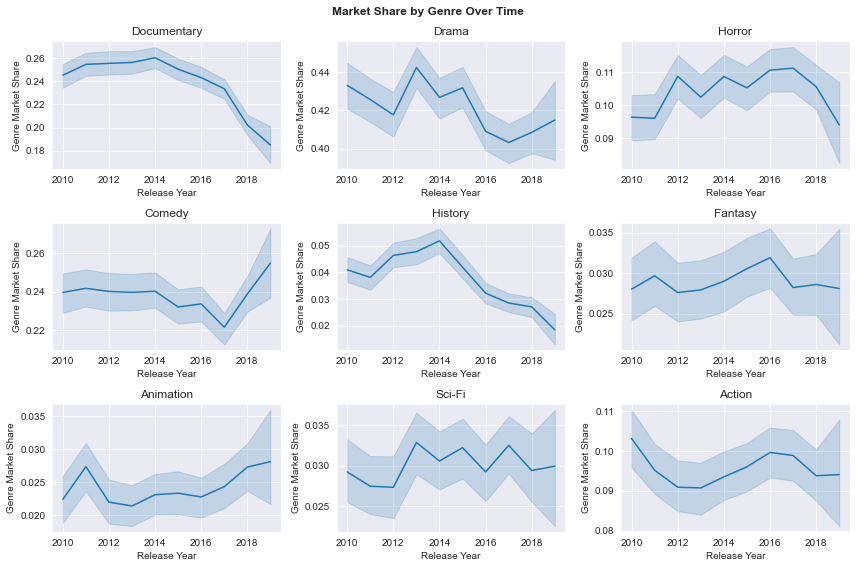

In [90]:
seaborn_subplots()